/var/folders/7q/3m0wqxpd2719blfvfs1_4vpr0000gn/T/ipykernel_57518/3423555079.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


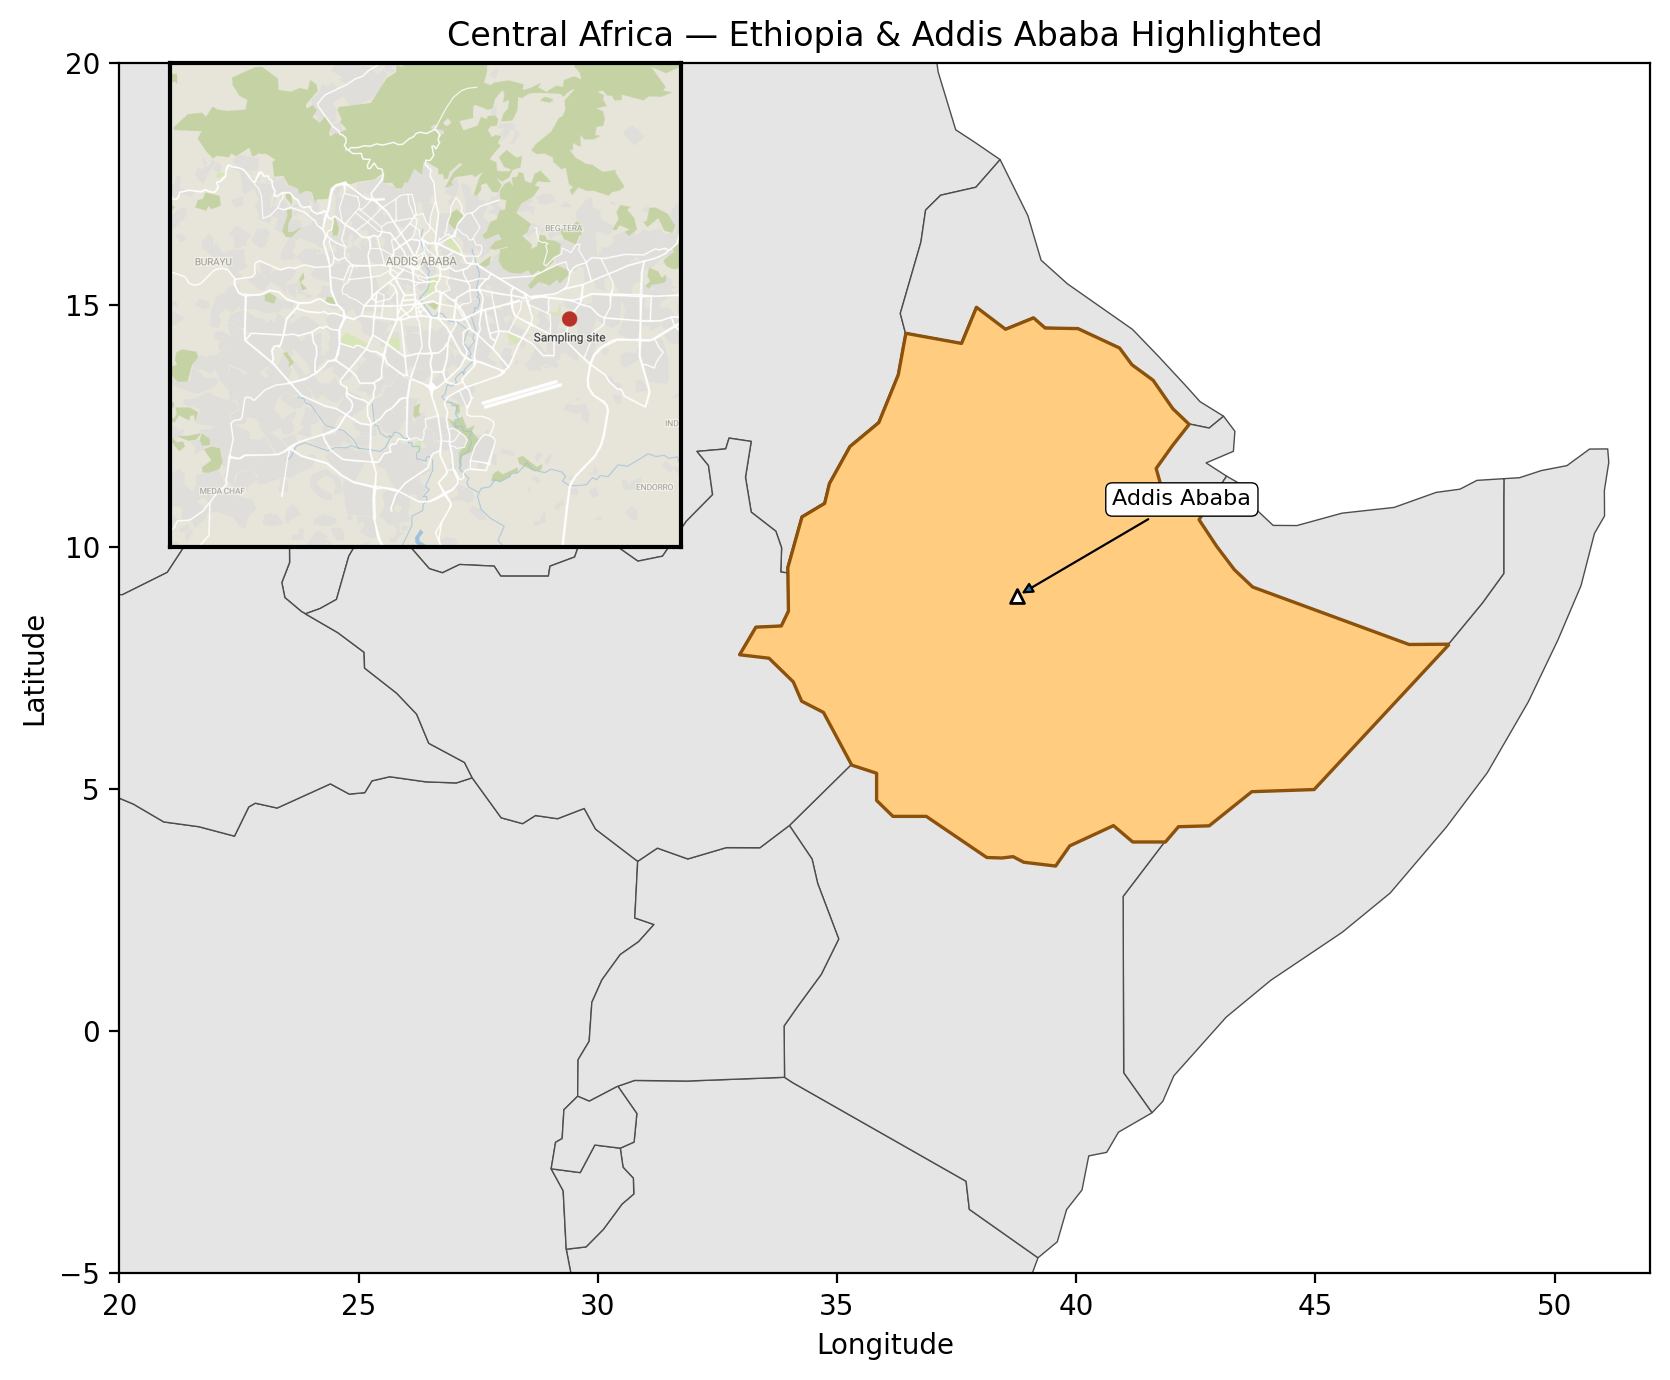

Map saved to: ethiopia_central_africa_map.png


In [ ]:
# Script to generate a central Africa map highlighting Ethiopia and Addis Ababa,
# with a corner inset showing the sampling site in the city.
#
# Dependencies: geopandas, shapely, matplotlib, contextily for street-level detail
# Data: uses Natural Earth low-res dataset from direct URL

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import image as mpimg
import os
from pathlib import Path

# Load Natural Earth (countries) - using direct URL since datasets module is deprecated
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

# Filter Africa and Ethiopia
africa = world[world["CONTINENT"] == "Africa"]
ethiopia = world[world["NAME"] == "Ethiopia"]

# Coordinates
# Capital (approx): Addis Ababa
addis_lat, addis_lon = 8.9806, 38.7578
addis_point = gpd.GeoDataFrame(geometry=[Point(addis_lon, addis_lat)], crs="EPSG:4326")

# Sampling site in Addis Ababa (user-provided)
site_lat, site_lon = 9.0106, 38.8207
site_point = gpd.GeoDataFrame(geometry=[Point(site_lon, site_lat)], crs="EPSG:4326")

# Create figure
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)

# Plot Africa base
africa.plot(ax=ax, facecolor="#E5E5E5", edgecolor="#4D4D4D", linewidth=0.5)

# Highlight Ethiopia
ethiopia.plot(ax=ax, facecolor="#FFCC80", edgecolor="#8C510A", linewidth=1.2)

# Plot Addis Ababa capital
addis_point.plot(ax=ax, markersize=25, marker="^", edgecolor="black", facecolor="white", zorder=5)

# Label for Addis Ababa with white background
ax.annotate(
    "Addis Ababa",
    xy=(addis_lon, addis_lat),
    xytext=(addis_lon + 2.0, addis_lat + 2.0),
    arrowprops=dict(arrowstyle="-|>", lw=0.8),
    fontsize=8,
    ha="left",
    va="center",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5)
)

# Set "Central Africa" region view (wide enough to include Ethiopia & neighbors)
ax.set_xlim(20, 52)
ax.set_ylim(-5, 20)

# Clean up axes
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Central Africa — Ethiopia & Addis Ababa Highlighted", fontsize=12)

# Inset: Load and display screenshot image (inside map area, top-left corner)
in_ax = inset_axes(ax, width="40%", height="40%", loc='upper left', borderpad=0)

# Load the screenshot image
_cwd = Path.cwd().resolve()
_repo_root = next((p for p in [_cwd, *_cwd.parents] if (p / "pyproject.toml").exists()), _cwd)
img_path = str((_repo_root / "InsetMap.png").resolve())
img = mpimg.imread(img_path)

# Display the image
in_ax.imshow(img)

# Remove all axis decorations from inset
in_ax.set_xticks([])
in_ax.set_yticks([])
in_ax.set_xlabel("")
in_ax.set_ylabel("")
# Add a border for the inset
for spine in in_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

# Save and show
out_path = "ethiopia_central_africa_map.png"
plt.tight_layout()
plt.savefig(out_path, bbox_inches="tight", dpi=1000)
plt.show()
print(f"Map saved to: {out_path}")
